In [1]:
# Importing all the required libraries :
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
# importing the data source
df = pd.read_csv(r'C:\Users\Suryaditya\Desktop\AnalytixLabs\TSF\Sample Solutions\SampleSuperstore.csv')

In [3]:
# rows and columns
df.shape 

(9994, 13)

In [4]:
# top 5 rows of the dataframe
df.head() 

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [5]:
df.info() 
# checking the column datatypes
# checking for any missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
Ship Mode       9994 non-null object
Segment         9994 non-null object
Country         9994 non-null object
City            9994 non-null object
State           9994 non-null object
Postal Code     9994 non-null int64
Region          9994 non-null object
Category        9994 non-null object
Sub-Category    9994 non-null object
Sales           9994 non-null float64
Quantity        9994 non-null int64
Discount        9994 non-null float64
Profit          9994 non-null float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [6]:
df.drop(['Country', 'Postal Code'], axis = 1, inplace=True)

#dropping the Country column, since it has only one unique data (USA).
#dropping the postal code column, since it has high cardinality. 

In [7]:
# top 5 rows of the dataframe now 
df.head() 

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


### A. PRODUCT (Category & Sub-Category) LEVEL ANALYSIS :

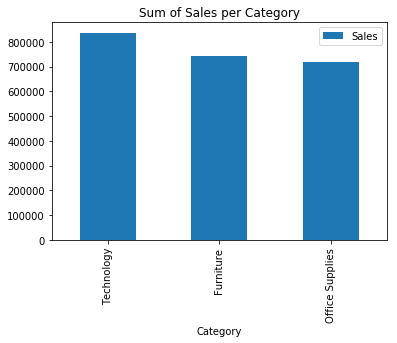

In [8]:
df.groupby(by=["Category"])[["Sales"]].sum().sort_values(by=['Sales'], ascending=False).plot.bar(width = 0.5)
plt.title('Sum of Sales per Category')
plt.show()

#### At category level the sales are almost equal with technology leading over furniture and office supplies.

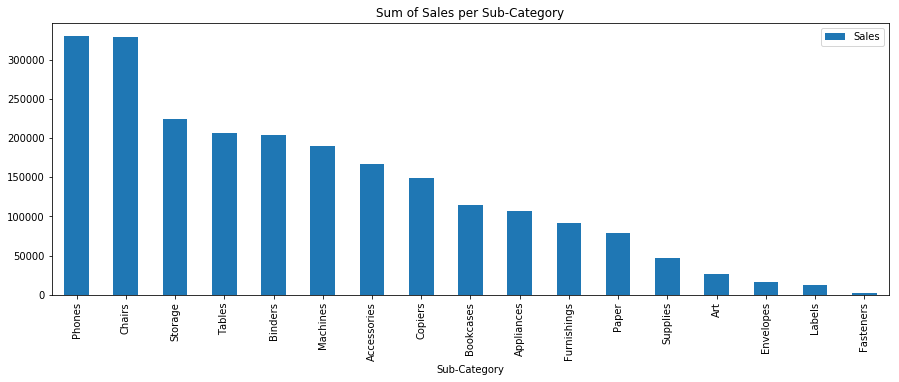

In [9]:
df.groupby(by=["Sub-Category"])[["Sales"]].sum().sort_values(by=['Sales'], ascending=False).plot.bar()
plt.gcf().set_size_inches(15, 5)
plt.title('Sum of Sales per Sub-Category')
plt.show()

#### 1) Phones and Chairs have the highest sales.
#### 2) While Storage, Tables, Blinders, Machines and Accessories have very close sales numbers.
#### 3) Labels and Fasteners have the lowest sales.

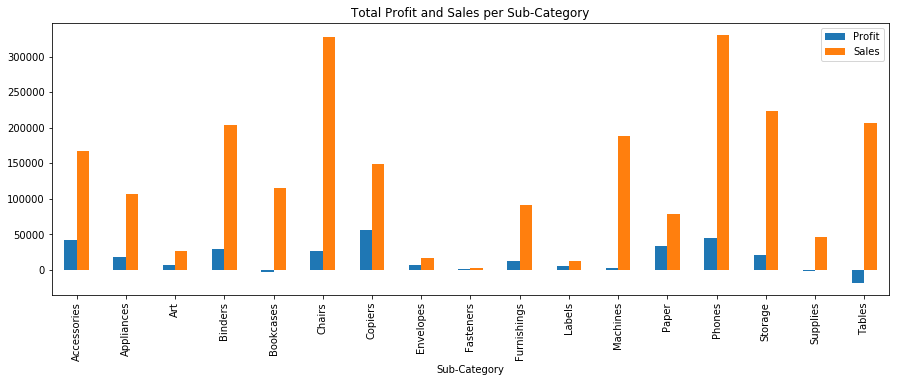

In [10]:
# Understanding Profit and Sales of each sub-category :

df.groupby('Sub-Category')['Profit','Sales'].sum().plot.bar()
plt.title('Total Profit and Sales per Sub-Category')
plt.gcf().set_size_inches(15, 5)
plt.show()

#### People dont prefer to buy Tables and Bookcases from Superstore. Hence these departments are in loss. But the profit is not very clear here. A column for profit% will explain the matter more clearly.

In [11]:
df['SP'] = (df['Sales']*df['Quantity'])-df['Discount']
df['CP'] = df['SP']-df['Profit']
df['Profit%'] = (df['Profit']/df['CP']) * 100

In [12]:
df.head()

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,SP,CP,Profit%
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136,523.9200,482.0064,8.695652
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820,2195.8200,1976.2380,11.111111
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714,29.2400,22.3686,30.718954
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310,4787.4375,5170.4685,-7.408052
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164,44.5360,42.0196,5.988634


In [13]:
df1 = df.sort_values(['Profit%'], ascending=False).groupby('Sub-Category')
df1[['Category','Sub-Category','Profit%']].head(10)

# displaying the top profitable products.

,Category,Sub-Category,Profit%
61,Office Supplies,Art,100.000000
8760,Office Supplies,Binders,100.000000
8656,Office Supplies,Paper,100.000000
9924,Office Supplies,Envelopes,100.000000
5561,Office Supplies,Binders,100.000000
6921,Office Supplies,Envelopes,100.000000
5592,Office Supplies,Binders,100.000000
2923,Office Supplies,Fasteners,100.000000
3984,Office Supplies,Paper,100.000000
5899,Office Supplies,Envelopes,100.000000


#### At product level, Art, Binders, Paper, Envelopes are making the maximum profit. These belong to Office Supplies, which is making the maximum profit out of the three categories, follwed by Technology (Copiers & Phones) and then Furniture.

### B. CUSTOMER (Segment) LEVEL ANALYSIS :

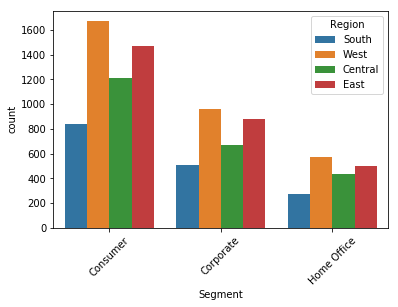

In [15]:
import seaborn as sns
sns.countplot(x="Segment", hue="Region", data=df)
plt.xticks(rotation=45)
plt.show()

# Consumer Count > Corporate Count > Home Office Count.

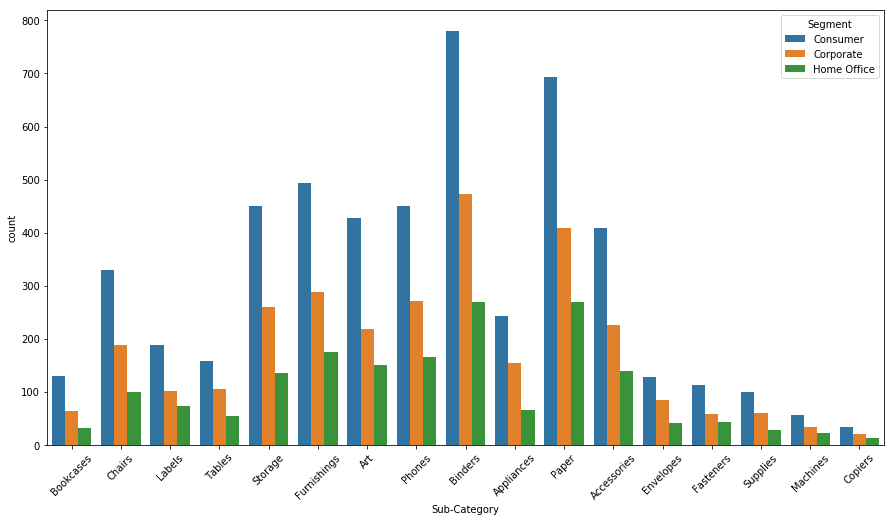

In [16]:
#Count of Sub-Category in the three segments :
plt.figure(figsize=(15,8))
sns.countplot(x="Sub-Category", hue="Segment", data=df)
plt.xticks(rotation=45)
plt.show()

# Similarly, Consumer Purchase > Corporate Purchase > Home Office Purchase.

### C. REGION LEVEL ANALYSIS :

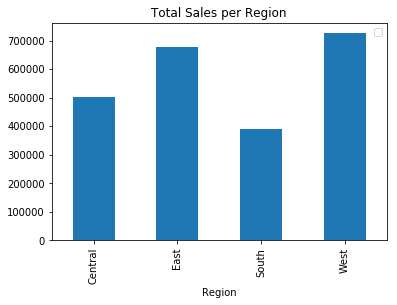

In [17]:
df.groupby(by=["Region"])[["Sales"]].sum().add_prefix("Sum_of_").plot.bar()
plt.title('Total Sales per Region')
plt.legend('')
plt.show()

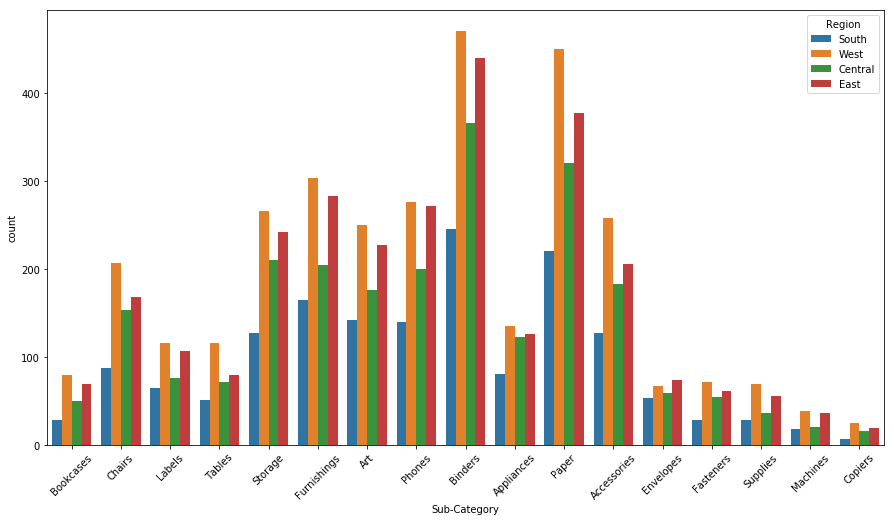

In [18]:
#Count of Sub-Category in the four region-wise
import seaborn as sns
plt.figure(figsize=(15,8))
sns.countplot(x="Sub-Category", hue="Region", data=df)
plt.xticks(rotation=45)
plt.show()

#### The western region clearly prefer the Super Store the most, followed by the people in eastern region.